# Instacart Final Project
Sherri Horton

<strong>Introduction:</strong> Instacart is part of the 'Uber' phenomenon where individuals act as contractors to fulfill grocery shopping tasks. By learning more
about user behavior and buying trends among different types of items and the frequency at which they are ordered, Instacart can not only
develop new products to increase business but also to help the consumer find what they need faster. 
<br></br>
<strong>Pitch:</strong> Using the Instacart open source data and machine learning, I will analyze the frequency at which types of products and specific products are purchased over a years time and across 200,000 Instacart users. I will then predict the probability of types of products to be re-ordered.
<br></br>
<strong>Goal:</strong> Predict the probability of a product being re-ordered (y) based on product type characteristics (x).
<br></br>
<strong>Model:</strong> Logistic Regression Model to predict the probability of the product being re-ordered according to the products characteristics [aisle, department, purchase day of week, etc]

I chose the Instacart data set because it seemed like it would be pretty interesting to learn about the buying habits of people and it seemed that an exercise in doing this would be beneficial in my current job.

My goal was to predict the probability of a product being re-ordered based on different product type characteristics. I chose to use a Logistic regression model because they are supposed to be the best at predicting probability within classification.

<strong>First Step was to import the data sets and merge into a DataFrame to get a global view of the data I was working with</strong>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

color = sns.color_palette()

#importing data sets
orders = pd.read_csv('../instacart_2017_05_01/orders.csv')
products = pd.read_csv('../instacart_2017_05_01/products.csv')
departments = pd.read_csv('../instacart_2017_05_01/departments.csv')
train = pd.read_csv('../instacart_2017_05_01/order_products__train.csv')
prior = pd.read_csv('../instacart_2017_05_01/order_products__prior.csv')
aisles = pd.read_csv ('../instacart_2017_05_01/aisles.csv')

In [69]:
#merge datasets into dataframe to see all data
order_products_prior_df = pd.DataFrame(prior)

products_df1 = pd.DataFrame(products)
orders_df2 = pd.DataFrame(orders)
dept_df3 = pd.DataFrame(departments)

orders_products_train_df3 = pd.DataFrame(train)
df4 = pd.merge(products_df1, orders_products_train_df3)
df5 = pd.merge(df4, orders_df2)
df7 = pd.merge(df5, dept_df3)
df6 = pd.merge(df7, aisles)
df6 = df6.sample(138462)

# Instacart EDA

### Product and Department Discovery

First I performed a thorough EDA of the multiple data sets provided. First going through product and department discovery including which department was the most popular for orders - Produce. Which product was the most popular - Bananas and a lot of organic fruits and veggies and not surprisingly, the most popular aisles, fresh fruits and vegetables. This is makes sense intuitively because of their perishable qualities.

In [3]:
amt_of_orders = orders_df2.loc[:, 'user_id'].value_counts().sort_index()
amt_of_orders = pd.DataFrame(df6.user_id.value_counts().reset_index())
amt_of_orders.columns = ['user_id', 'order_count']
merged_df6 = pd.merge(df6, amt_of_orders)
df6.head(5)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
806891,9597,Sweet Kale Chopped Salad,123,4,80491,12,0,198833,train,9,1,19,30.0,produce,packaged vegetables fruits
787013,26800,Organic Baby Kale Mix,123,4,202141,16,1,177869,train,17,5,17,25.0,produce,packaged vegetables fruits
439904,43352,Raspberries,32,4,48044,10,1,122872,train,4,3,12,9.0,produce,packaged produce
616269,8277,Apple Honeycrisp Organic,24,4,968856,13,1,149422,train,30,3,18,4.0,produce,fresh fruits
819380,28157,American Blend Salad,123,4,1005324,4,1,13624,train,6,4,19,10.0,produce,packaged vegetables fruits


> First I want to see what department has the most orders.

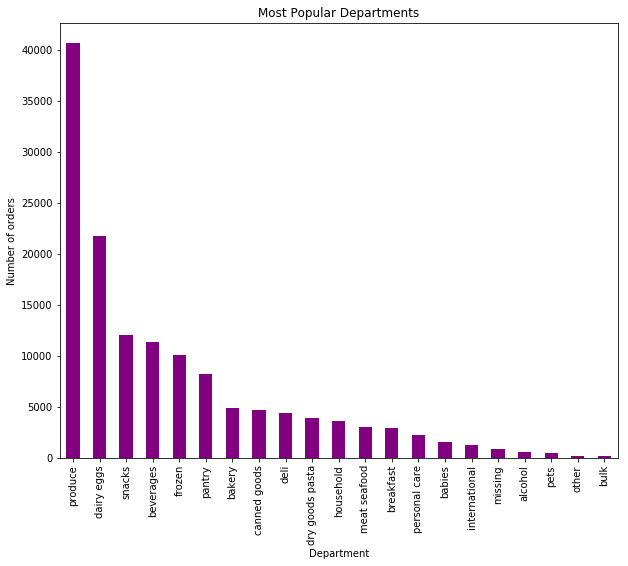

In [13]:
df6.loc[:, 'department'].value_counts().head(30).plot(kind='bar', color='purple', figsize=(10,8))
plt.xlabel('Department');
plt.ylabel('Number of orders');
plt.title('Most Popular Departments');
plt.show()

> Produce has the most orders, followed by dairy eggs, snacks and beverages. The popularity of produce makes intuitive sense and I wouldn't be surprised to find that produce and eggs have the highest re-orderability as well based on their perish quality.

> Next I wanted to see how many times each product was ordered and ID the most popular products.

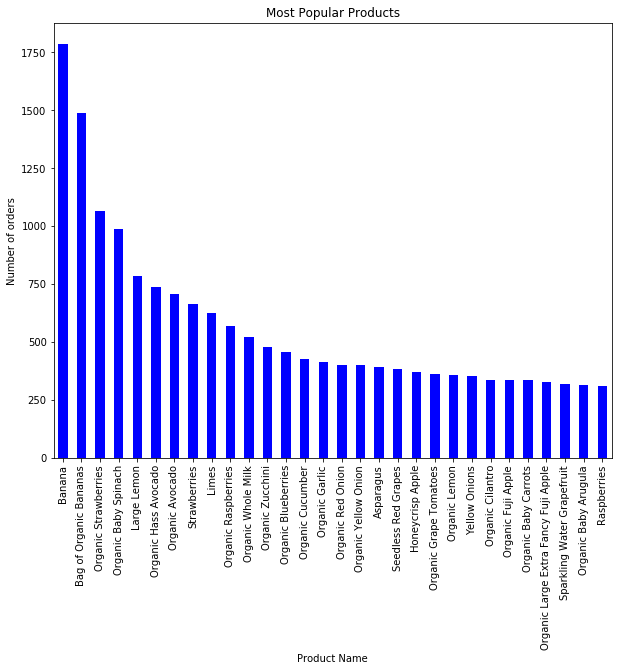

In [12]:
df6.loc[:, 'product_name'].value_counts().head(30).plot(kind='bar', color='blue', figsize=(10,8))
plt.xlabel('Product Name');
plt.ylabel('Number of orders');
plt.title('Most Popular Products');
plt.show()

> Bananas are clearly the most ordered product, with organic Bananas following. There are actually a lot of Organic products in the higher tier of ordered/re-ordered products.

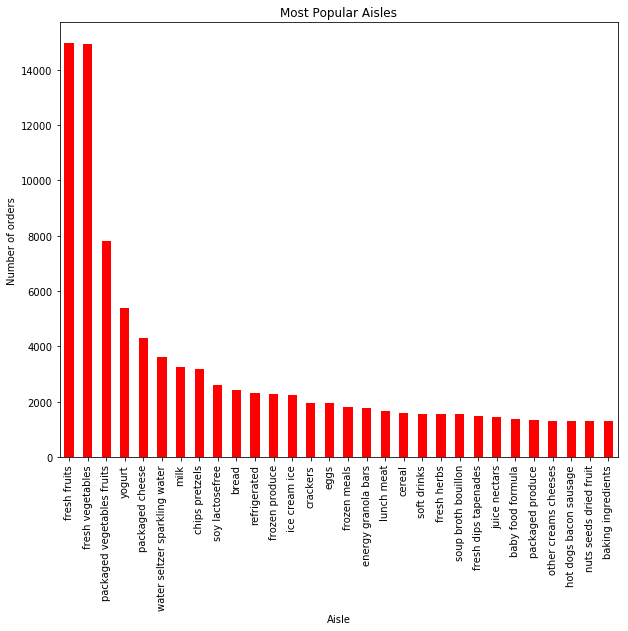

In [14]:
df6.loc[:, 'aisle'].value_counts().head(30).plot(kind='bar', color='red', figsize=(10,8))
plt.xlabel('Aisle');
plt.ylabel('Number of orders');
plt.title('Most Popular Aisles');
plt.show()

### Order Frequency Discovery


Next I dove into order frequency discovery and found that most orders occur on Sundays and ordering occurs pretty steadily throughout the day starting at 9am until around 4 or 5, with purchase peak times between 1 and 3. As well as Monday mornings between 8 and 10am. I also found out that most re-orders occur monthly, weekly or within a week.


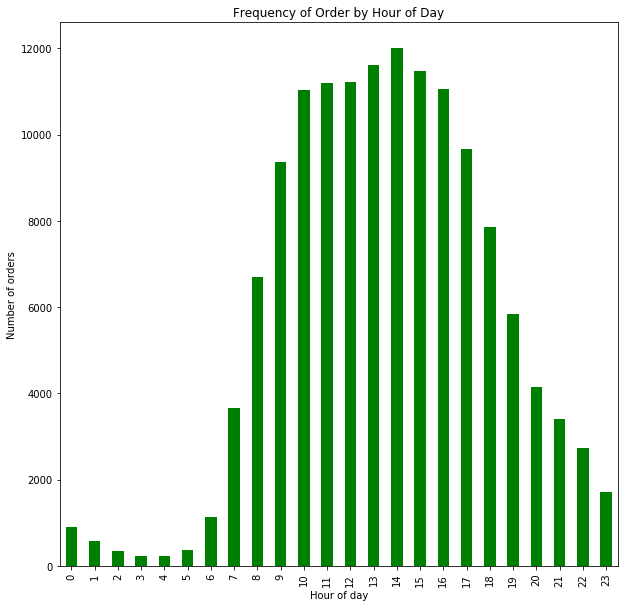

In [15]:
merged_df6.loc[:, 'order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='green', figsize=(10,10));
plt.xlabel('Hour of day');
plt.ylabel('Number of orders');
plt.title('Frequency of Order by Hour of Day');

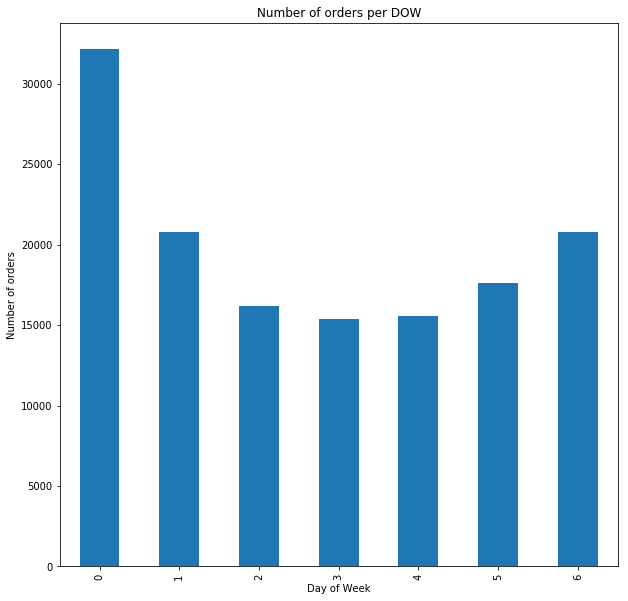

In [16]:
merged_df6.loc[:, 'order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10,10));
plt.xlabel('Day of Week');
plt.ylabel('Number of orders');
plt.title('Number of orders per DOW');

Most orders occur on (what I believe to be) Sundays. Which intuitively makes sense so they can shop for the week. They also happen pretty steadily throughout the day starting at 9am until around 4 or 5, with a purchase peak between 1 and 3. And also Monday mornings. Depicted below in a heat map.

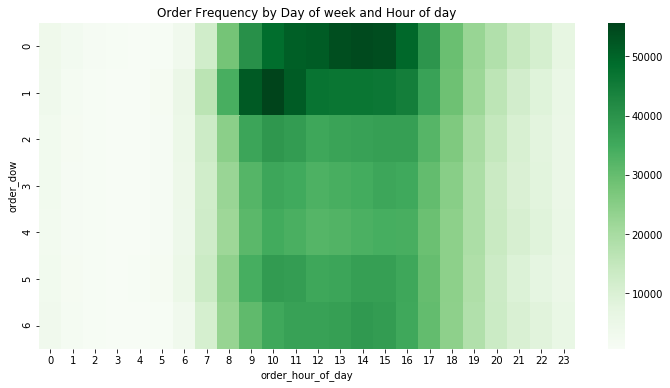

In [18]:
hour_dow_df = orders_df2.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
hour_dow_df = hour_dow_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(hour_dow_df, cmap="Greens")
plt.title("Order Frequency by Day of week and Hour of day")
plt.show()

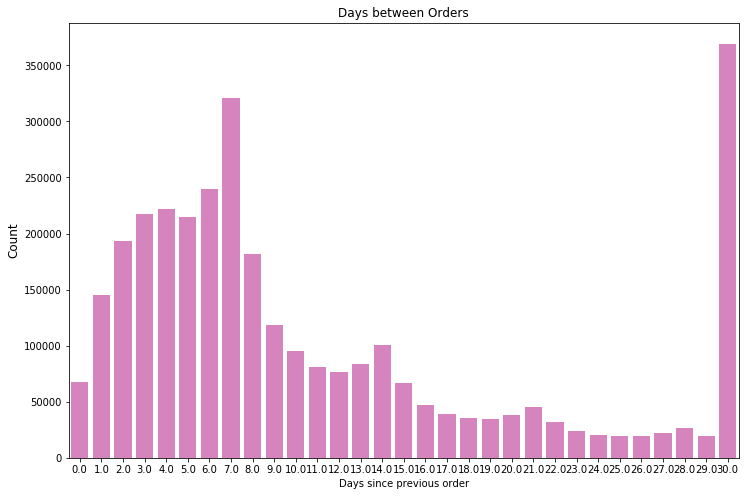

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df2, color=color[6])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since previous order', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Days between Orders", fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()

Most re-orders are monthly or weekly. 

### Re-ordering Discovery

Next I did re-ordering discovery since that is what I would need to predict in my model. I learned the average re-order takes place very early in the morning between 6am and 8am and mostly occurs on Sunday or Friday. With Wednesday at 6am actually being the average peak re-order time for the users. I also found that the most popular department to recieve reorders was dairy and eggs followed by produce, pet products, beverages and bakery items. Produce and dairy were unsurprising because of their perishable qualities and how popular they are from our earlier analysis but pet products and beverages surprised me. Thinking on it now, and my pet food ordering habits, that 30 day re-order spike might be largely pet food but thats speculative and I’d have to do more digging to find that definitively.

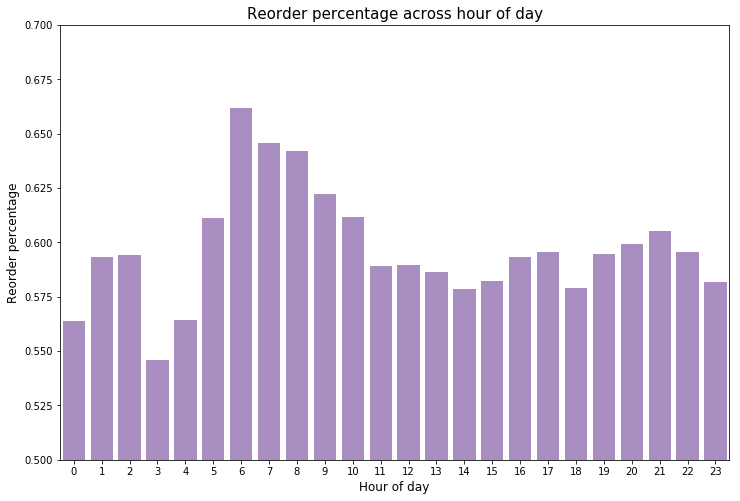

In [42]:
reorder_df = df6.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(reorder_df['order_hour_of_day'].values, reorder_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder percentage across hour of day", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylim(0.5, 0.7)
plt.show()

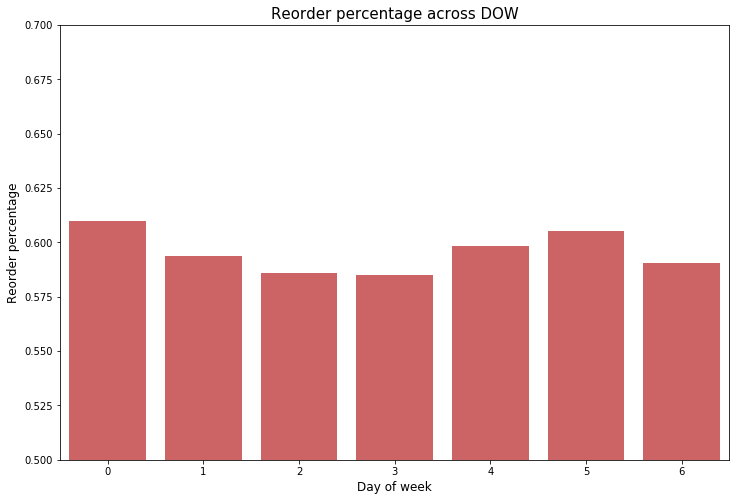

In [43]:
reorder_df = df6.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(reorder_df['order_dow'].values, reorder_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder percentage across DOW", fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylim(0.5, 0.7)
plt.show()

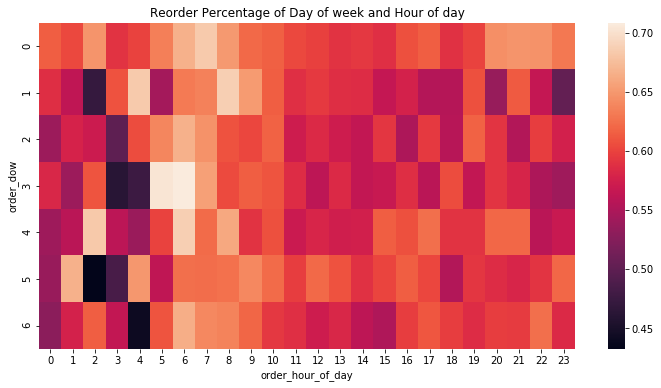

In [45]:
reorder_df = df6.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
reorder_df = reorder_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(reorder_df)
plt.title("Reorder Percentage of Day of week and Hour of day")
plt.show()

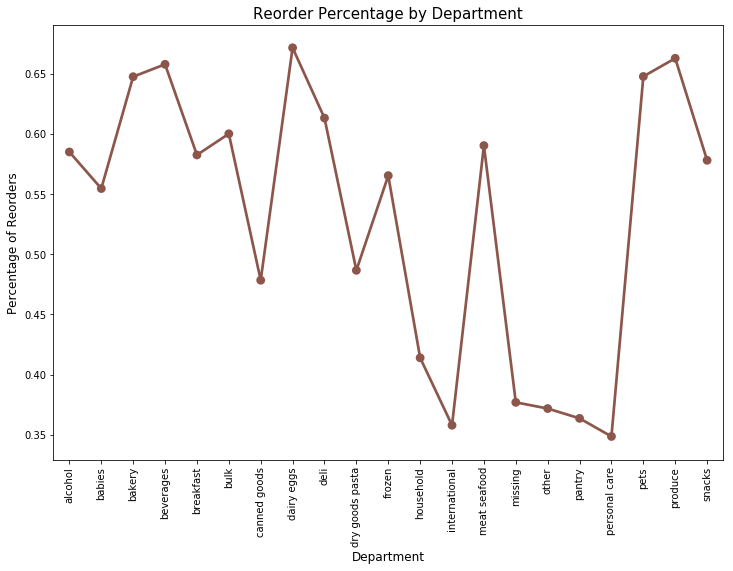

In [46]:
reorder_df = df6.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(reorder_df['department'].values, reorder_df['reordered'].values, alpha=0.8, color=color[5])
plt.ylabel('Percentage of Reorders', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reorder Percentage by Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Logistic Regression Model

<strong>Model:</strong> Logistic Regression Model to predict the probability of the product being re-ordered according to the products characteristics [aisle, department, add to card order, purchase day of week, purchase hour of the day]

I chose a logistic regression model because they are the best to predict probability based on a 1 or 0 data point. Since I am studying reorder rates I created a model to predict whether a product would be reordered based on different features.

In [70]:
df6.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
435373,6871,Smoked Gouda,2,16,107820,3,0,163488,train,4,4,16,17.0,dairy eggs,specialty cheeses
1022977,42900,Grapefruit Citrus Soda,77,7,2750948,13,1,145733,train,5,1,12,30.0,beverages,soft drinks
325572,22224,Whole Milk Plain Greek Yogurt,120,16,2117096,2,0,59045,train,5,6,14,30.0,dairy eggs,yogurt
38126,5134,Organic Thompson Seedless Raisins,117,19,2574810,21,0,154780,train,9,2,14,30.0,snacks,nuts seeds dried fruit
204341,33772,Eggo Thick & Fluffy Original Waffles,52,1,1584118,3,1,101619,train,15,2,8,30.0,frozen,frozen breakfast


In [71]:
df6 = df6.drop('eval_set', axis=1)
df6 = df6.drop('days_since_prior_order', axis=1)
df6 = df6.drop('product_id', axis=1)
df6 = df6.drop('user_id', axis=1)
df6 = df6.drop('product_name', axis=1)
df6 = df6.drop('order_id', axis=1)

In [72]:
df6 = df6.drop('order_number', axis=1)

In [73]:
df6['reordered'].value_counts()

1    82959
0    55503
Name: reordered, dtype: int64

I had to drop a lot of columns because of the size of the data even with sampling. When trying to run the model with a ton of product and order IDs, it would not execute. The data set is pretty skewed because 82K of the products have been reordered while on 55k have not be reordered.

### Models 1 and 2

My first model focused on department, aisle, and the add to cart order of the product as my key features. The accuracy of this model was 63% which isn't the strongest of models so I decided to expand my features and include day of week, hour of day data as well and this didn’t have much of an impact on my model’s accuracy. I then opened it up to all features in the data set and my accuracy actually went to 57%. Based on the accuracies of these models, I wouldn't use any of the 3 I created to solve this problem. The accuracy was too low for any kind of prediction to be trustworthy. 

In [76]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
LogReg1 = LogisticRegression()

In [90]:
df6_md1 = pd.get_dummies(df6[['department','aisle','add_to_cart_order',
                              'reordered']], drop_first = True)
df6

LogReg1 = LogisticRegression()

X1 = df6_md1.drop('reordered', axis =1)
y1 = df6_md1['reordered']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

LogReg1.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
name = df6_md1.columns.drop('reordered')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,add_to_cart_order,-0.0338026
1,department_babies,-0.00807034
2,department_bakery,0.248306
3,department_beverages,0.318014
4,department_breakfast,0.259936
5,department_bulk,0.127218
6,department_canned goods,-0.0345094
7,department_dairy eggs,0.459623
8,department_deli,0.3466
9,department_dry goods pasta,-0.0485656


In [109]:
y_pred = LogReg1.predict(x_test1)

In [110]:
metrics.accuracy_score(y_test1,y_pred)

0.63251097758262076

In [111]:
metrics.confusion_matrix(y_test1,y_pred)

array([[ 3790, 10220],
       [ 2501, 18105]])

In [112]:
metrics.roc_auc_score(y_test1,y_pred)

0.57457432029353561

In [113]:
metrics.log_loss(y_test1,y_pred)

12.692857245360392

Pretty bad accuracy score of 63%; 3793 True Negatives and 18104 True Positives. The Area Under the ROC Curve is 0.57 meaning my model gains a very little more insight than random guessing. With a log loss of over 12 is very bad.

### All Feature Log Model [Last ditch effort to make this work]

By opening up the model to use all possible features, I hoped the accuracy of the model would improve. Because of the slowness of execution when including all features, I still had to keep the features at a minimum. Surprisingly, when I created the all feature model collecting data points from the whole data set, my accuracy went down compared to the other two more narrow models. 

### Conclusion

<p>In conclusion, I wouldn't use any of the 3 models I created to solve this problem. The accuracy was too low for any kind of prediction to be trustworthy. Without a strong model, I feel the most important pieces of this presentation lie in the EDA where we learned the most popular product tends to be organic fruit and vegetables; The most popular day for orders to take place is on Sundays between 1 and 3 and on Monday mornings; that most re-orders occur within a week or not usually until 30 days with the highest peaks being monthly or weekly. The highest re-order ratio also tended to be produce and dairy/eggs but what I found interesting is that even though they are not among the most popular products, the pet, beverages and bakery departments also have a very high re-order ratio.</p>


### Next Steps

>This information from the EDA can help inform the construction of more sophisticated models to predict when a specific user may return to the site to re-order and then can use that information to send them reminders or push alerts with their commonly purchased products.

> Create a new model using a RandomForest approach to improve the accuracy of my predictions.